In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos con buenos o malos riesgos crediticios.

In [3]:
df = pd.read_csv('german_risk.csv')
df.head()

,sex,age_cat,foreign_worker,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,marital_status,credit-risk
0,male,aged,yes,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,single,good
1,female,young,yes,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,...,real estate,22.0,none,own,1.0,skilled,1.0,none,div/dep/mar,bad
2,male,aged,yes,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,single,good
3,male,aged,yes,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,single,good
4,male,aged,yes,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,single,bad


**Columnas Numéricas**

- `duration`: Duración en meses. Rango (4,72).
- `credit_amount`: Cantidad de crédito solicitada. Rango (250, 18424) en DM - Marco alemán.
- `installment_commitment`: Tasa de cuota en porcentaje del ingreso disponible. Rango (1,4).
- `residence_since`: Tiempo de residencia actual. Rango (1,4).
- `age`: Edad en años. Rango (19, 75).
- `existing_credits`: Número de créditos existentes en este banco. Rango (1,4) en DM - Marco alemán.
- `num_dependents`: Número de personas responsables de proveer el mantenimiento. Rango (1,2).

**Columnas Categóricas**

- `checking_status`: Valores `'0<=X<200', '<0', '>=200', 'no checking'`.
- `credit_history`: Historial crediticio del solicitante. Valores `['all paid', 'critical/other existing credit', 'delayed previously', 'existing paid', 'no credits/all paid']`.
- `purpose`: Motivo por el cual el solicitante solicitó un préstamo. Valores `['business', 'domestic appliance', 'education', 'furniture/equipment', 'new car', 'other', 'radio/tv', 'repairs', 'retraining', 'used car']`.
- `savings_status`: Cuenta de ahorros/bonos. Valores `['100<=X<500', '500<=X<1000', '<100', '>=1000', 'no known savings']`.
- `employment`: Empleo actual desde (en años). Valores `['1<=X<4', '4<=X<7', '<1', '>=7', 'unemployed']`.
- `other_parties`: Otros deudores / garantes. Valores `['co applicant', 'guarantor', 'none']`.
- `property_magnitude`: Bienes del solicitante. Valores `['car', 'life insurance', 'no known property', 'real estate']`.
- `other_payment_plans`: Otros planes de pago a plazos. Valores `['bank', 'none', 'stores']`.
- `housing`: Situación de vivienda del solicitante. Valores `['for free', 'own', 'rent']`.
- `job`: Categorías de empleo definidas por el banco. Valores `['high qualif/self emp/mgmt', 'skilled', 'unemp/unskilled non res', 'unskilled resident']`.
- `own_telephone`: Si hay un teléfono registrado a nombre del cliente. Valores `['none', 'yes']`.
- `foreign_worker`: Variable protegida. Valores `['no', 'yes']`.
- `sex`: Variable protegida. Valores `['female', 'male']`.
- `marital_status`: Estado personal. Valores `['div/dep/mar', 'div/sep', 'mar/wid', 'single']`.

**Etiqueta (variable objetivo)**

- `credit-risk`: `'good'` (favorable) o `'bad'` (desfavorable).

In [4]:
df.columns

Index(['sex', 'age_cat', 'foreign_worker', 'checking_status', 'duration',
       'credit_history', 'purpose', 'credit_amount', 'savings_status',
       'employment', 'installment_commitment', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'marital_status', 'credit-risk'],
      dtype='object')

In [5]:
df_hombres1 = df[df['sex'] == 'male']
df_mujeres1 = df[df['sex'] == 'female']

**Pregunta 1**: ¿Qué atributos demográficos puedes identificar? ¿Cómo son las distribuciones de estas variables?

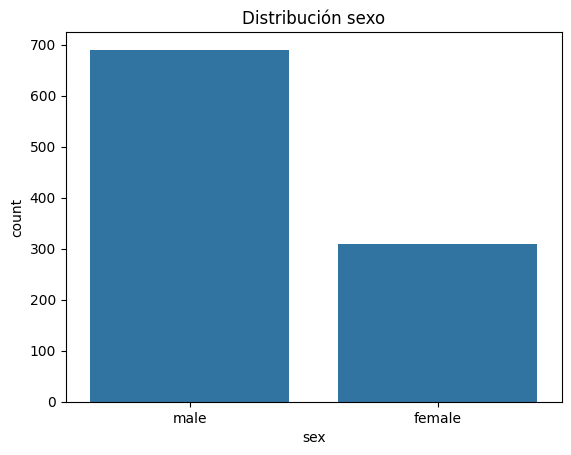

In [6]:
sns.countplot(data=df, x='sex')
plt.title('Distribución sexo')
plt.show()

In [7]:
df['sex'].value_counts(normalize=True) * 100

sex
male      69.0
female    31.0
Name: proportion, dtype: float64

En este caso, podemos ver que los hombres se encuentran sobrerepresentados en los datos, siendo más del doble que las mujeres. Esto significa un desbalanceo importante de nuestros datos, y podría afectar nuestros modelos.

In [8]:
# Tomaremos la columna de age, y la transformaremos en una variable de int para poder hacer un histograma 
df['age'] = df['age'].astype(int)


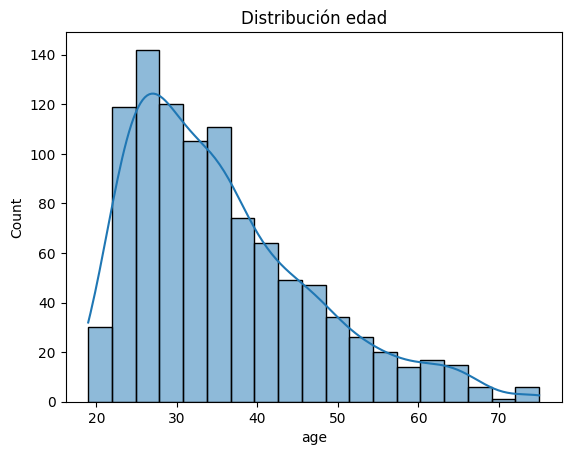

In [9]:
# Haremos un histograma para ver la distribucion de la edad
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribución edad')
plt.show()





In [10]:
df['age'].value_counts(normalize=True) * 100

age
27    5.1
26    5.0
23    4.8
24    4.4
28    4.3
25    4.1
30    4.0
35    4.0
36    3.9
31    3.8
29    3.7
32    3.4
33    3.3
34    3.2
37    2.9
22    2.7
40    2.5
38    2.4
42    2.2
39    2.1
46    1.8
43    1.7
47    1.7
44    1.7
41    1.7
45    1.5
20    1.4
21    1.4
49    1.4
50    1.2
48    1.2
54    1.0
57    0.9
52    0.9
51    0.8
55    0.8
63    0.8
61    0.7
53    0.7
60    0.6
65    0.5
58    0.5
64    0.5
66    0.5
74    0.4
67    0.3
68    0.3
56    0.3
59    0.3
75    0.2
19    0.2
62    0.2
70    0.1
Name: proportion, dtype: float64

Podemos notar que el 5.1% de las entradas es de personas de 27 años, se ve ciertamente parejo entre las edadeds de 27 a 35. Que son las edades con mas entradas en nuestros datos.

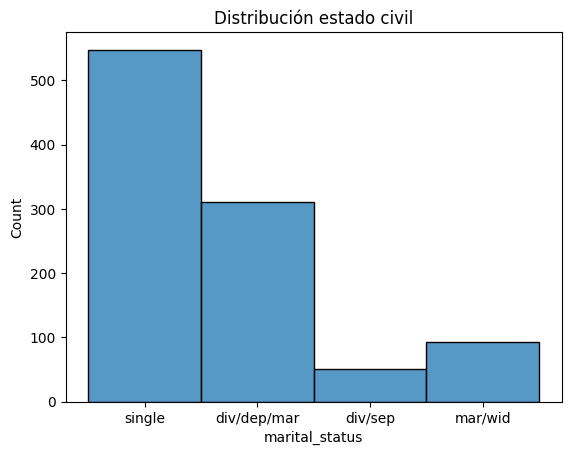

In [11]:
# Ahora tomaremos el marital status y haremos un grafico de barras para ver la distribucion
sns.histplot(data=df, x='marital_status', kde=False)
plt.title('Distribución estado civil')
plt.show()


In [12]:
df['marital_status'].value_counts(normalize=True) * 100

marital_status
single         54.8
div/dep/mar    31.0
mar/wid         9.2
div/sep         5.0
Name: proportion, dtype: float64

Podemos notar que los solteros esta en un 54% de nuestros datos, por lo tanto es mas de la mitad, cosa que nos podria dar problemas para futuros modelos

**Pregunta 2**: ¿Qué subpoblaciones interseccionales puedes identificar? Revisa su representación respecto del total de los datos.

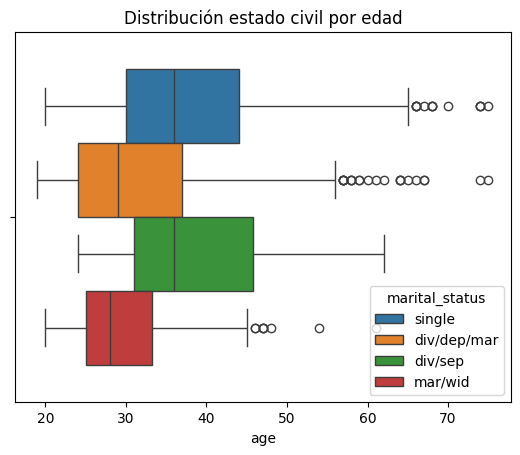

In [31]:
# Edad y Estado civil
sns.boxplot(data=df, x='age', hue='marital_status')
plt.title('Distribución estado civil por edad')
plt.show()




In [14]:
# Ahora haremos crosstab entre edad y estado civil
pd.crosstab(df['age'], df['marital_status'], normalize='index') * 100


marital_status,div/dep/mar,div/sep,mar/wid,single
age,,,,
19,100.000000,0.000000,0.000000,0.000000
20,57.142857,0.000000,21.428571,21.428571
21,42.857143,0.000000,28.571429,28.571429
22,48.148148,0.000000,22.222222,29.629630
23,66.666667,0.000000,10.416667,22.916667
24,52.272727,2.272727,9.090909,36.363636
25,51.219512,2.439024,12.195122,34.146341
26,40.000000,4.000000,16.000000,40.000000
27,27.450980,1.960784,17.647059,52.941176


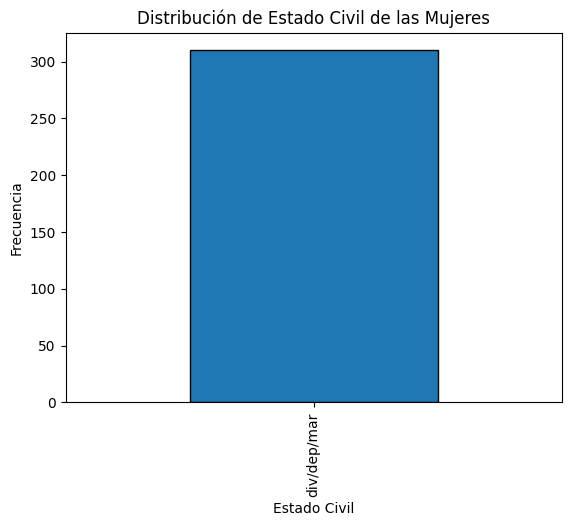

In [15]:

marital_status_counts = df_mujeres1['marital_status'].value_counts()

# Crear un gráfico de barras de las ocurrencias
marital_status_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribución de Estado Civil de las Mujeres')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

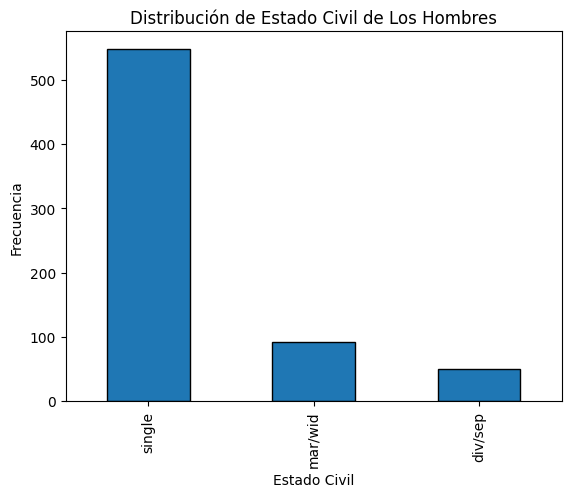

In [16]:
marital_status_counts = df_hombres1['marital_status'].value_counts()

# Crear un gráfico de barras de las ocurrencias
marital_status_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribución de Estado Civil de Los Hombres')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

In [17]:
pd.crosstab(index=df['sex'], columns=df['marital_status'], normalize='index') * 100

marital_status,div/dep/mar,div/sep,mar/wid,single
sex,,,,
female,100.0,0.000000,0.000000,0.00000
male,0.0,7.246377,13.333333,79.42029


Aquí podemos notar que el 100% de las mujeres estan div/dep/mar, mientras que los hombres es un 0%.

**Pregunta 3**: Revisa la distribución de algunos de los atributos dentro de las subpoblaciones.

C:\Users\Poble\AppData\Local\Temp\ipykernel_28440\4253598358.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)


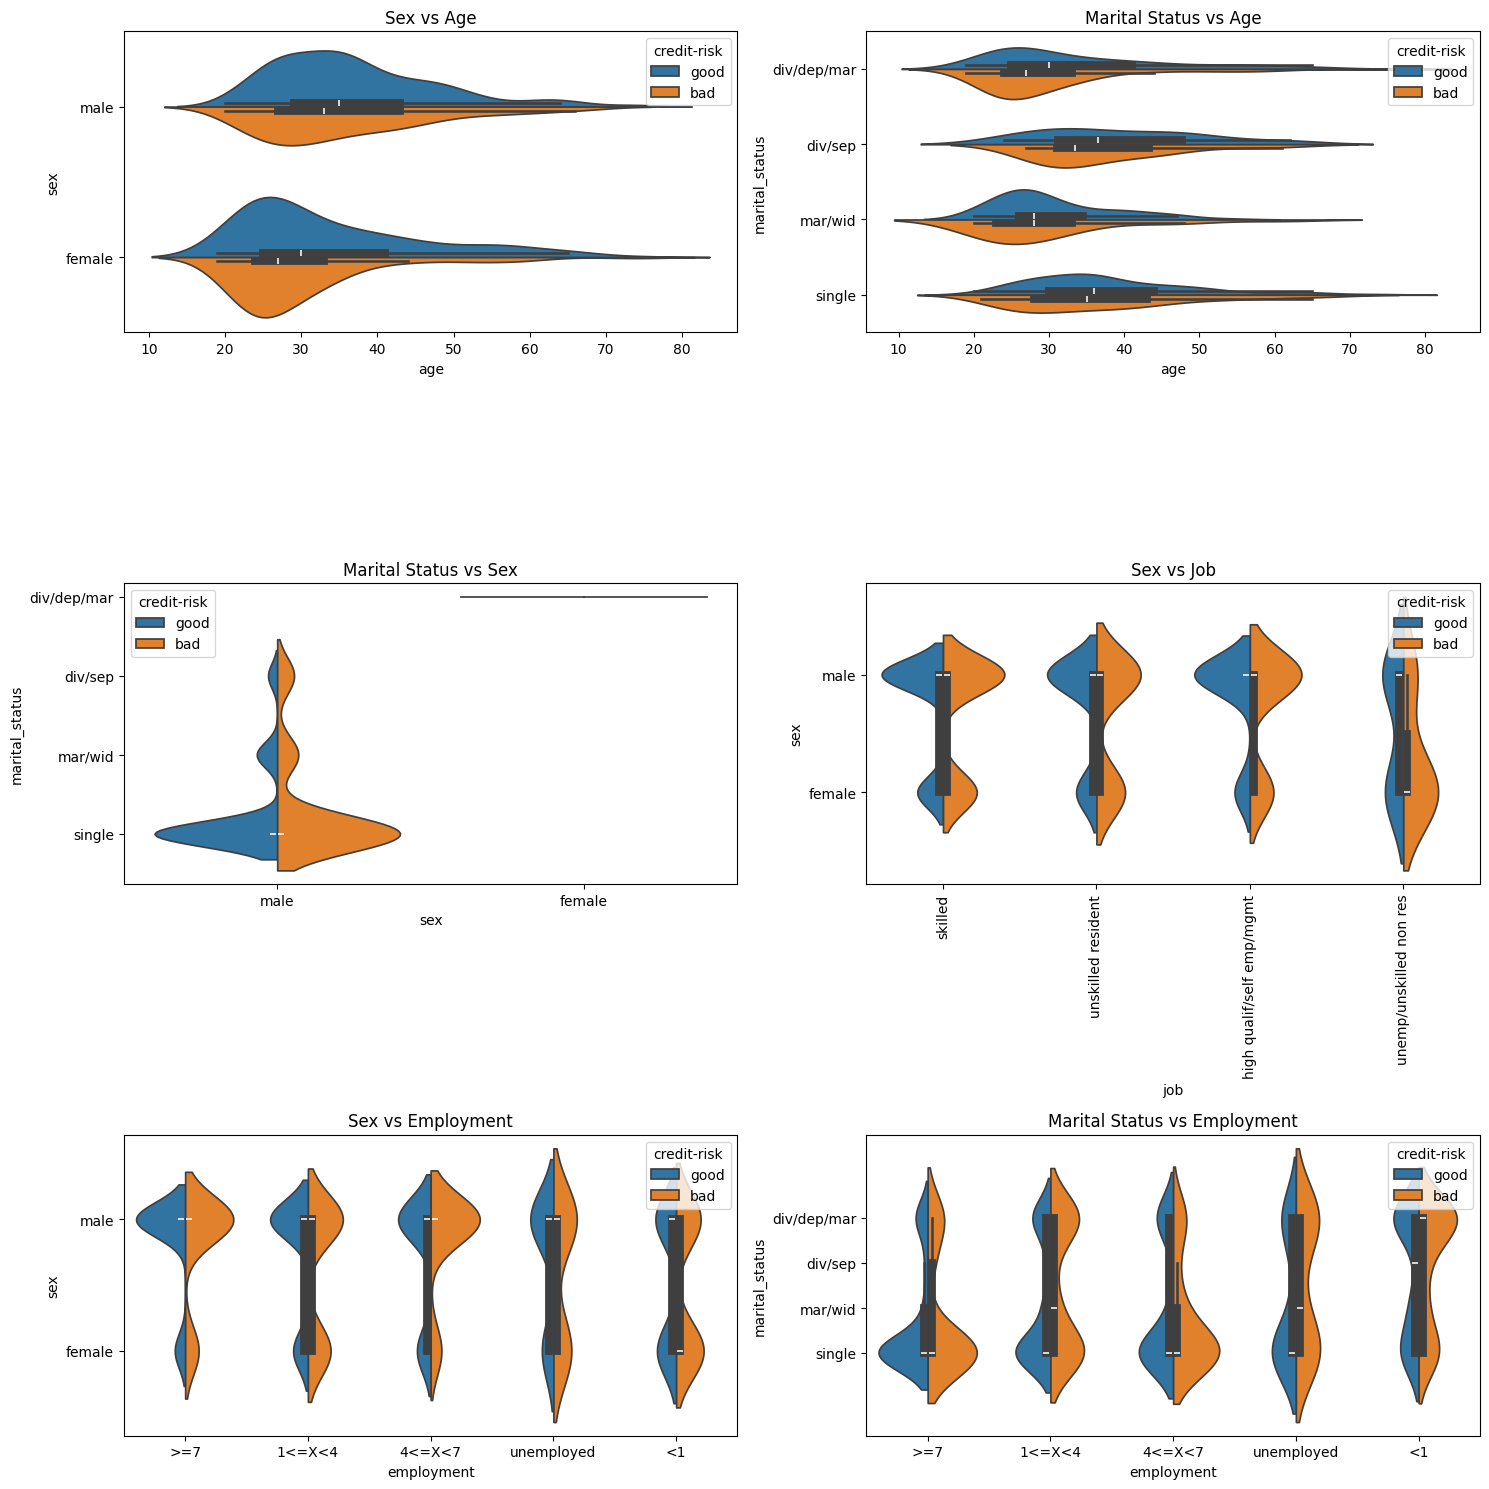

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Gráfico 1: Sex vs Age
sns.violinplot(y="sex", x="age", hue="credit-risk", split=True, data=df, ax=axs[0, 0])
axs[0, 0].set_title('Sex vs Age')

# Gráfico 2: Marital Status vs Age
sns.violinplot(y="marital_status", x="age", hue="credit-risk", split=True, data=df, ax=axs[0, 1])
axs[0, 1].set_title('Marital Status vs Age')

# Gráfico 3: Marital Status vs Sex
sns.violinplot(y="marital_status", x="sex", hue="credit-risk", split=True, data=df, ax=axs[1, 0])
axs[1, 0].set_title('Marital Status vs Sex')

# Gráfico 4: Sex vs Job
sns.violinplot(y="sex", x="job", hue="credit-risk", split=True, data=df, ax=axs[1, 1])
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_title('Sex vs Job')

# Gráfico 5: Sex vs Employment
sns.violinplot(x="employment", y="sex", hue="credit-risk", split=True, data=df, ax=axs[2, 0])
axs[2, 0].set_title('Sex vs Employment')

# Gráfico 6: Marital Status vs Employment
sns.violinplot(x="employment", y="marital_status", hue="credit-risk", split=True, data=df, ax=axs[2, 1])
axs[2, 1].set_title('Marital Status vs Employment')


plt.tight_layout()
plt.show()

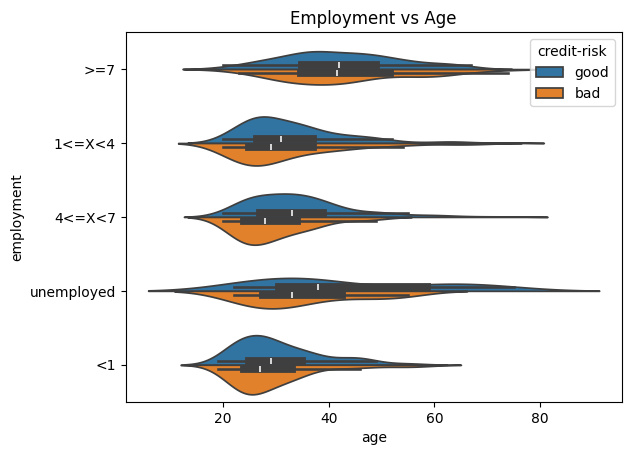

In [152]:
sns.violinplot(x="age", y="employment", hue="credit-risk", split=True, data=df)
plt.title('Employment vs Age')
plt.show()



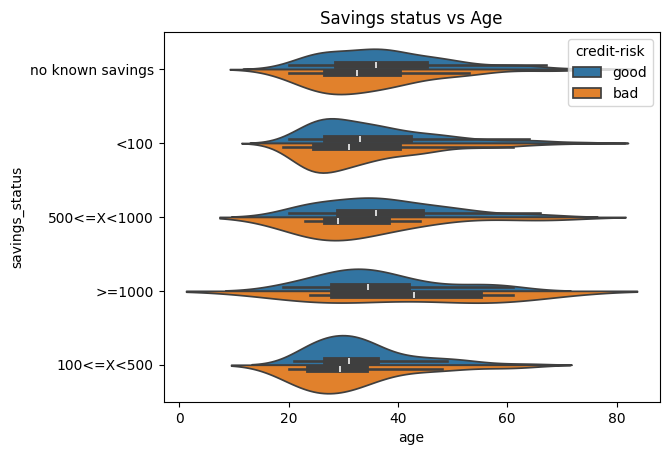

In [155]:
# savings_status vs credit-risk
sns.violinplot(x="age", y="savings_status", hue="credit-risk", split=True, data=df)
plt.title('Savings status vs Age')
plt.show()



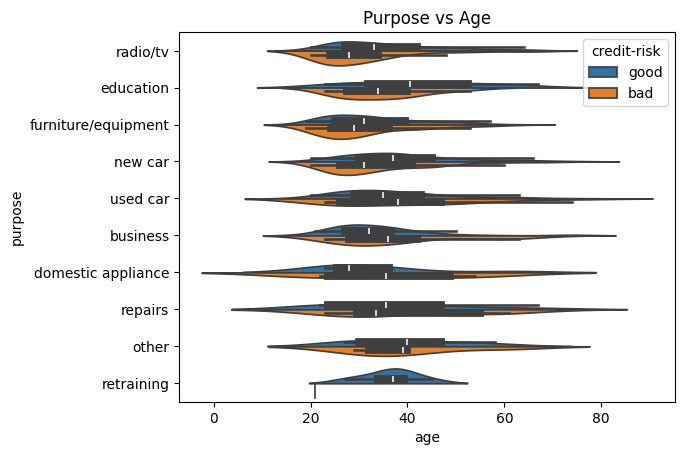

In [156]:
# purpose vs age 
sns.violinplot(x="age", y="purpose", hue="credit-risk", split=True, data=df)
plt.title('Purpose vs Age')
plt.show()


**Pregunta 4**: ¿Cómo distribuye la variable objetivo (credit-risk) dentro de las subpoblaciones? ¿Qué problemas identificas?

Como podemos ver en el grafico de Sex vs Job el problema es que en en el eje x especificamente en unemp/unskilled non res, las mujeres se ven de cierta forma mas perjudicadas en cuanto a credit-risk se refiere en comparacion con el hombre, notemos que "bad" de color naranjo es mucho mas que "good" de color azul, en cambio al hombre, se le perjudica mucho menos.

En el grafico de Sex vs Age notemos que a las mujeres de entre 20 a 30 años se les considera un credit-risk mucho mas malo en comparacion a los hombres, como en el grafico anterior, se les perjudica por el hecho de ser mujeres, esto es que existe cierta discriminacion en cuanto al riesgo crediticio.

Igualmente podemos notar que a los que no se saben si tienen ahorros, les cuesta mucho mas conseguir un credito, ya que estan calificados como "bad". Lo que en teoria esta bien, ya que no se sabe si tienen la capacidad de pagar un credito.



**Pregunta 5**: Reflexiona acerca de las consecuencias que podría tener implementar un algoritmo que participe en el proceso de decisión de un banco en la asignación de créditos.

Las consecuencias que podria tener la implementacion de un algoritmo para esta toma de decisiones podria ser desastroso para la sociedad, ya que este codigo podria tener sesgos con parte de la poblacion, agregando ademas que estariamos dependiendo de datos mas no de juicios subjetivos. Ademas de que los datos de entrada pueden llegar a tener errores en su preprocesamiento, por lo que existirian problemas en la toma de decisiones, todo seria un caos.
Para que se pueda implementar un algoritmo de este tipo, deberia de ser un algoritmo casi perfecto, que no tenga sesgos, que sepa manejar problemas de datos, que pueda "contextualizar" para poder tomar una decision sin errores.